basic linear regression(process)

코딩 환경 구성:코드작성에 필요한 패키지/라이브러리 업로드
import matplotlib.pyplot as plt, from sklearn.linear_model import LinearRegression
데이터 로드:numpy의 random함수로 x, y, delta 100개 생성, 정렬
sorted(10 * np.random.rand(100, 1)) + delta
데이터 탐색(EDA):데이터셋의 구성, 변수의 분포, 변수들 간의 상관 관계 등을 탐색. 시각화 도구
plt.plot(X, Y, 'o’), plt.show()
데이터 전처리:학습에 적합한 형태로 가공. 변수 스케일링, 결측치 처리, 범주형 변수 인코딩 등.
StandardScaler(), train_test_split(X,Y,test_size = 0.3)
모델 학습:예측 모델을 선택. 선형 회귀, 의사결정 트리, 랜덤 포레스트 등 다양한 모델.
model = LinearRegression() model.fit(X_train, y_train)
모델 평가:학습된 모델의 성능을 평가. MSE, 결정 계수(R-squared) 등을 사용.
model.score(X_test, y_test)



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# Generate random data for a regressoion problem
delta = np.random.rand(100,1) # random noise
X =  sorted(10 * np.random.rand(100,1)+delta) # Indepedent variable
Y = sorted(10 * np.random.rand(100)) # Dependent variable

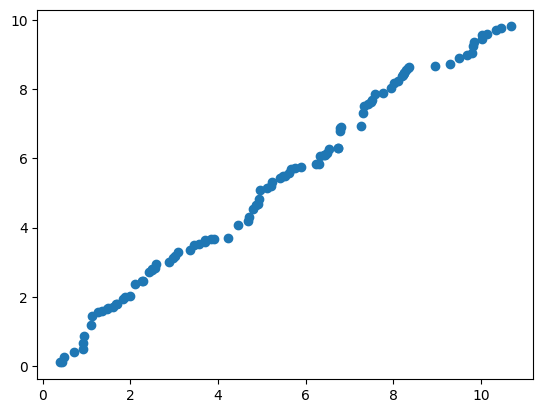

In [4]:
plt.plot(X,Y,'o')
plt.show()

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test =  train_test_split(X,Y,test_size=0.3,random_state=72)

In [16]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
# Print the model coefficients and intercept
print('Linear regression coeff:{}'.format(model.coef_))
print('Linear regression intercept: {}'.format(model.intercept_))

Linear regression coeff:[0.95784892]
Linear regression intercept: 0.11287664292199473


In [18]:
# Evaluate the model on training and test data
print("Training Data evaluation: {}".format(model.score(X_train,y_train)))
print("Test Data evaluation:{}".format(model.score(X_test,y_test)))

Training Data evaluation: 0.9904498499020163
Test Data evaluation:0.9902133562243381


In [9]:
# Make predictions on the test set
forecast = model.predict(X_test)

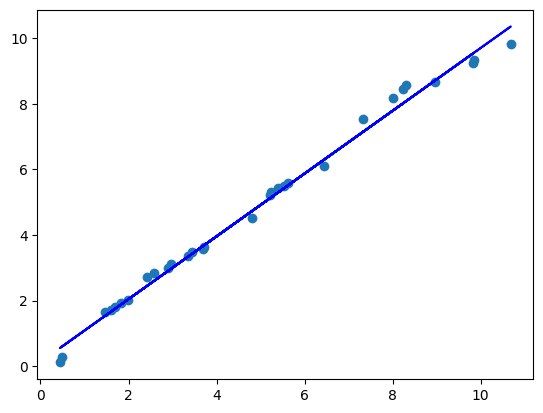

In [10]:
# Plot the original test data points and the regression line
plt.scatter(X_test,y_test)
plt.plot(X_test,forecast,'-b')
plt.show()

In [19]:
# Calculate MSE and RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Training Data MSE : {:.4f}".format(train_mse))
print("Test Data MSE : {:.4f}".format(test_mse))
print("Training Data RMSE : {:.4f}".format(train_rmse))
print("Test Data RMSE : {:.4f}".format(test_rmse))

Training Data MSE : 0.0705
Test Data MSE : 0.0884
Training Data RMSE : 0.2656
Test Data RMSE : 0.2974


[선형 회귀] RMSE: 5.3685
[랜덤 포레스트] RMSE: 4.1763


c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\IPython\core\pylabtools.py:170: Use

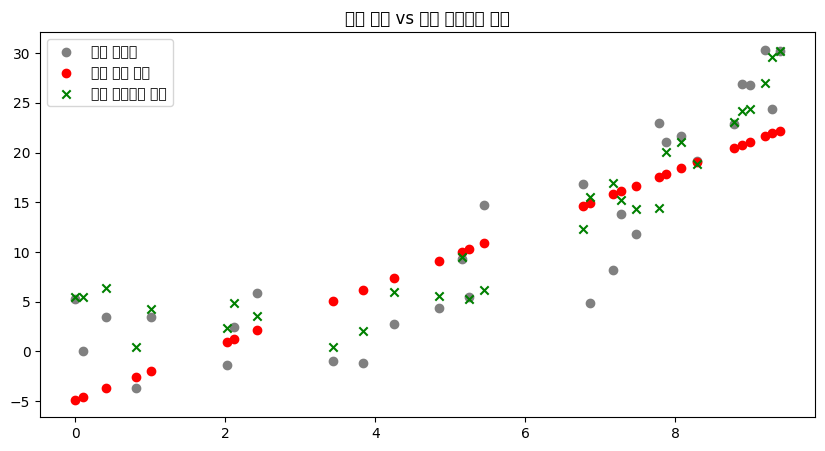

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. 곡선 형태의 데이터 생성
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 0.5 * X**2 - 2 * X + 3 + np.random.randn(100, 1) * 3  # 포물선 + 노이즈

# 2. 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=30)

# 3. 선형 회귀 모델 학습
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# 4. 랜덤 포레스트 회귀 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())  # y는 1차원이어야 함
y_pred_rf = rf_model.predict(X_test)

# 5. 성능 평가 (RMSE)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"[선형 회귀] RMSE: {rmse_lin:.4f}")
print(f"[랜덤 포레스트] RMSE: {rmse_rf:.4f}")

# 6. 시각화
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, label='실제 데이터', color='gray')
plt.scatter(X_test, y_pred_lin, label='선형 회귀 예측', color='red')
plt.scatter(X_test, y_pred_rf, label='랜덤 포레스트 예측', color='green', marker='x')
plt.title("선형 회귀 vs 랜덤 포레스트 회귀")
plt.legend()
plt.show()
